# # Hava Goruntusu - Dalgacik Donusumu
### Sekil 3.37

In [26]:
# coding: utf-8
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def resize(a, new_shape, stretch=True,method='linear'):
    """ Returns a in the new_shape.
    stretch=True: Interpolate as necessary. If false, use numpy.resize
    method= 'linear' ==> interp2d kind.
    %Only supports 2D at the moment   
    """
    import numpy as np
    if stretch==False:
        return np.resize(a, new_shape)
    import scipy
    import scipy.interpolate
    x=np.arange(a.shape[0])
    y=np.arange(a.shape[1])
    interpFun=scipy.interpolate.interp2d(x,y,a )
    X=np.arange(new_shape[0])*a.shape[0]/new_shape[0]
    Y=np.arange(new_shape[1])*a.shape[1]/new_shape[1]
    return interpFun(X,Y)

def scalogram2(data, vmin=None, vmax=None, max_level=None, scale=None, percent=False, verbose=False):
    """ scalogram2(data, vmin=None, vmax=None)
    Plots a 2D scalogram for wavelet transforms generated by
    pywt.wavedec2 using imshow.
    """

    if percent==True:
      maxData=[]
      sumData=[]
      sumData.append(abs(data[0]).sum());
      #sumData=0;     
      maxData.append(abs(data[0]).max())
      for row in range(1,len(data)):
        sumData.append(abs(data[row][0]).sum()); sumData.append(abs(data[row][1]).sum()); sumData.append(abs(data[row][2]).sum());
        maxData.append(abs(data[row][0]).max()); maxData.append(abs(data[row][1]).max()); maxData.append(abs(data[row][2]).max());
      sumData=np.array(sumData)
      maxData=np.array(maxData)
      multiplier=1./maxData;
      if verbose:
        #print('sumData');print(sumData);
        #print('maxData');print(maxData);
        #print('multiplier'); print(multiplier);
        print('Percent'); print(np.round(sumData/sumData.sum()*100.))
    else:
      multiplier=np.ones([1,len(data)*3+1]);
    if not max_level:
      max_level=len(data);
    if scale=='power' or scale=='logpower':
      ppower=(len(data)+1)**2*np.ones(data[0].shape);
    approx=abs(data[0])*multiplier[0];
    #plt.matshow(approx);plt.title('Preloop');
    for row in range(1,len(data)):
        #scale = 2.0 ** (row - len(data))
        #print row
        #print approx.shape
        #print data[row][0].shape
        if approx.shape[0]<> data[row][0].shape[0]:            
            approx=resize(approx, data[row][0].shape);
            if scale=='power' or scale=='logpower':
              ppower=resize(ppower, data[row][0].shape);  
            #print basic.resize
        arr=np.zeros([ data[row][0].shape[0]*2, data[row][0].shape[1]*2] )
        #print arr.shape
        #print approx.shape
        #plt.matshow(approx);plt.title(['Row', str(row)]);
        #if verbose:
        #   #print('0 Min: %E    Max: %E' % (abs(data[row][0]).min(), abs(data[row][0]).max()))
        #   #print('1 Min: %E    Max: %E' % (abs(data[row][1]).min(), abs(data[row][1]).max()))
        #   #print('2 Min: %E    Max: %E' % (abs(data[row][2]).min(), abs(data[row][2]).max()))
        
        arr[0:approx.shape[0], 0:approx.shape[1]]=approx;
        arr[0:approx.shape[0], approx.shape[1]: ]=abs(data[row][0])*multiplier[row*3-2];
        arr[approx.shape[0]: , 0:approx.shape[1]]=abs(data[row][1])*multiplier[row*3-1];
        arr[approx.shape[0]: , approx.shape[1]: ]=abs(data[row][2])*multiplier[row*3];
        approx=arr; #save for next loop.
        if scale=='power' or scale=='logpower':
          power=(len(data)+1-row)**2*np.ones([ data[row][0].shape[0]*2, data[row][0].shape[1]*2] )
          power[0:ppower.shape[0], 0:ppower.shape[1]]=ppower;
          ppower=power;
        if row==max_level:
            break


    if not vmin:
    	vmin = min(arr.ravel())
    if not vmax:
    	vmax = max(arr.ravel())        
    plt.figure();   
    plt.gca().set_autoscale_on(False)
    if scale=='log':
        plt.imshow(
            10*np.log10(arr),
            interpolation = 'nearest',
            vmin = 10*np.log10(vmin),
            vmax = 10*np.log10(vmax),
            extent = [0, 1, 0, 1])      
        plt.colorbar();
        plt.title('Logscale')
    elif scale=='sqrt':
        plt.imshow(
            np.sqrt(arr),
            interpolation = 'nearest',
            vmin = np.sqrt(vmin),
            vmax = np.sqrt(vmax),
            extent = [0, 1, 0, 1])      
        plt.colorbar();
        plt.title('SQRT')        
    elif scale=='power':
    	vmin = min((arr/power).ravel())
    	vmax = max((arr/power).ravel())
        plt.imshow(
            arr/power,
            interpolation = 'nearest',
            vmin = vmin,
            vmax = vmax,
            extent = [0, 1, 0, 1])      
        plt.colorbar();
        plt.title('Power')
    elif scale=='logpower':
    	vmin = min((10*np.log10(arr/power)).ravel())
    	vmax = max((10*np.log10(arr/power)).ravel())
        plt.imshow(
            10*np.log10(arr/power),
            interpolation = 'nearest',
            vmin = vmin,
            vmax = vmax,
            extent = [0, 1, 0, 1])      
        plt.colorbar();
        plt.title('LogPower')
    else:            
        plt.imshow(
            arr,
            interpolation = 'nearest',
            vmin = vmin,
            vmax = vmax,
            extent = [0, 1, 0, 1])  
        plt.colorbar();
        plt.title('Linear scale') 
    #if verbose:
    #  print('vmin: %E, vmax: %E ' %(vmin, vmax))
    #Draw Dividers
    for r in xrange(1,max_level):
        s = 2.0 ** (r - max_level); #s=scale, but scale is used above and below 
        lim=2.*s;        
        #print scale
        plt.plot([s, s],[1-lim, 1], 'r', linewidth=4)
        plt.plot([0, lim],[1-s, 1-s], 'r', linewidth=4)
    if scale=='power' or scale=='logpower':
        plt.matshow(power);plt.colorbar();plt.title('Denominator');
    return arr

### Hava Goruntusu

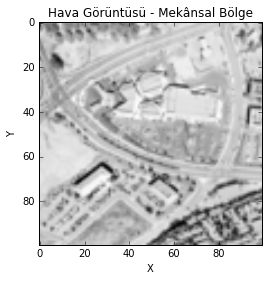

In [27]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import pywt
L=100
aircam=scipy.misc.imread('../ext/airborne_image.tif', flatten=True)
aircam=scipy.misc.imresize(aircam, [L,L])
setup_graph(x_label='X', y_label='Y', title=u'Hava Görüntüsü - Mekânsal Bölge')
plt.imshow(aircam);plt.gray();

### Simdi de dalgacik karsiligina bakalim

Percent
[ 62.   2.   2.   1.   5.   4.   3.   9.   7.   5.]


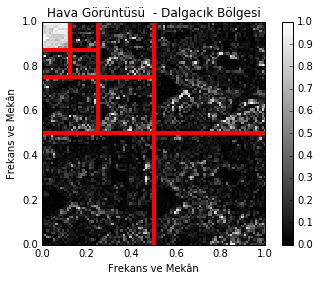

In [28]:
wavelet_type='haar';

Caircam=coeff = pywt.wavedec2(aircam, wavelet_type, level=3)
scalogram2(Caircam, scale='linear', percent=True, verbose=True);plt.gray()
plt.title(u'Hava Görüntüsü  - Dalgacık Bölgesi');plt.xlabel(u'Frekans ve Mekân');plt.ylabel(u'Frekans ve Mekân')